In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
#inspector = inspect(engine)
#columns = inspector.get_columns('station')
#for c in columns:
 #   print(c['name'], c["type"])

In [12]:
##engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

In [13]:
sel = [Measurement.date,
       Measurement.prcp,
      ]
twelveMonthPrcpAvg = session.query(*sel).\
    filter(Measurement.date > '2016-08-22').\
    order_by(Measurement.date).all()
twelveMonthPrcpAvg

[('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.12),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', 0.35),
 ('2016-08-29', 0.9),
 ('2016-08-30', 0.02),
 ('2016-08-30', 0.05),
 ('2016-08-31', 0.13),
 ('2016-08-31', 0.1),
 ('2016-08-31', 0.25),
 ('2016-08-31', 0.24),
 ('2016-08-31', 2.46),
 ('2016-09-01', 0.02),
 ('2016-09-01', 0.01),
 ('2016-09-02', 0.02),
 ('2016-09-02',

In [14]:
##  session.query(twelveMonthPrcpAvg).filter(twelveMonthPrcpAvg.prcp == 0).\
    ####  delete(synchronize_session=False)

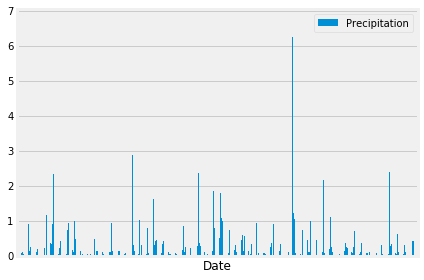

In [37]:
df = pd.DataFrame(twelveMonthPrcpAvg, columns=['Date', 'Precipitation'])

df2 = df.dropna(axis=0)
df2.set_index('Date', inplace=True)
df2.plot.bar()
plt.xticks([])
plt.tight_layout()
#plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
plt.show()

#for xlabel_i in frame1.axes.get_yticklabels():
 #   xlabel_i.set_fontsize(0.0)
  #  xlabel_i.set_visible(False)

# Exploratory Climate Analysis

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# *deals with lists where **deals with dicts
# the .\ says to not process yet but go to the next line
# next line grabs the month as a string so =="05" returns may



# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


![precipitation](Images/precipitation.png)

In [36]:
# Use Pandas to calcualte the summary statistics for the precipitation data

describe1=df.describe()
describe1

,Precipitation
count,1147.000000
mean,0.312363
std,0.576781
min,0.010000
25%,0.030000
50%,0.100000
75%,0.310000
max,6.700000


![describe](Images/describe.png)

In [18]:
# Design a query to show how many stations are available in this dataset?

selStations = [Station.name]
numberOfStations = session.query(Station.name).count()
numberOfStations

9

In [19]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [20]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [21]:
# Get a list of column names and types
#columns = inspector.get_columns('Station')
#for c in columns:
 #   print(c['name'], c["type"])

In [22]:
session.query(Measurement.station, Station.station).limit(10).all()

[('USC00519397', 'USC00519397'),
 ('USC00519397', 'USC00513117'),
 ('USC00519397', 'USC00514830'),
 ('USC00519397', 'USC00517948'),
 ('USC00519397', 'USC00518838'),
 ('USC00519397', 'USC00519523'),
 ('USC00519397', 'USC00519281'),
 ('USC00519397', 'USC00511918'),
 ('USC00519397', 'USC00516128'),
 ('USC00519397', 'USC00519397')]

In [23]:
### filter allows the condition that limits the join
#########################################################JOIN
#same_station = session.query(Measurement, Station).filter(Measurement.station == Station.station).limit(10).all()

#for record in same_station:
#    (Measurement, Station) = record
#    print(Measurement.station, Station.station)
#    print(Measurement.station)

In [24]:
# Return all animals from EA and NA belonging to the same sporder.
# This JOINs the data in the two tables together into a single dataset (here in the form of a tuple).
# Note: We are going to limit the results to 10 for printing
###################################################################JOIN FILTER
#sel = [Measurement.station, Measurement.prcp, Station.station, Station.name]
#same_station = session.query(*sel).filter(Measurement.station == Station.station).limit(10).all()

#for record in same_sporder:
#    (Measurement_station, Measurement_prcp, Station_station, Station_name) = record
#    print(record)

In [25]:

# What are the most active stations? (i.e. what stations have the most rows)?

# List the stations and the counts in descending order.

##############################################################descendong order isn't working numbers till not right
prcpCount = func.count(Measurement.prcp)
sel = [Measurement.station, 
       prcpCount]
prcpCount = session.query(*sel).\
    group_by(Measurement.station).\
    order_by(prcpCount.desc()).all()   ############### Is being ordered by the pcrp not the count
prcpCount                              ################### How can I order by the count??


[('USC00519281', 1973),
 ('USC00516128', 1937),
 ('USC00513117', 1765),
 ('USC00519523', 1191),
 ('USC00514830', 1114),
 ('USC00519397', 919),
 ('USC00511918', 534),
 ('USC00518838', 256),
 ('USC00517948', 229)]

In [26]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature at the most active station?
####mostActive = session.query(Measurement.station == "USC00519281").all()
sel = [(Measurement.station == "USC00519281"), 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs), 
      ]

#for r in mostActive:--------------------Data rate exceeded for notebook
#    print(sel)
#print(mostActive)
mostActiveList = session.query(*sel).all()
mostActiveList

[(False, 54.0, 87.0, 72.82335148215365)]

C:\Users\Brian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


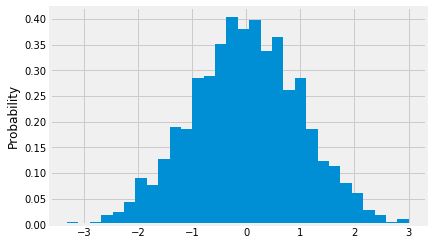

In [27]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
x = np.random.normal(size = 1000)
plt.hist(x, normed=True, bins=30)
plt.ylabel('Probability');

In [28]:
# Choose the station with the highest number of temperature observations.

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#tempCount = func.count(Measurement.tobs)
selTobs = [Measurement.station,
           Measurement.date,
           Measurement.tobs,
           #tempCount
          ]
tobsCount = session.query(*selTobs).\
    filter(Measurement.date > '2016-08-22').all()
 #   group_by(Measurement.station).\
#    order_by(tempCount.desc()).all()
tobsCount


[('USC00519397', '2016-08-24', 79.0),
 ('USC00519397', '2016-08-25', 80.0),
 ('USC00519397', '2016-08-28', 78.0),
 ('USC00519397', '2016-08-31', 80.0),
 ('USC00519397', '2016-09-04', 75.0),
 ('USC00519397', '2016-09-07', 76.0),
 ('USC00519397', '2016-09-09', 79.0),
 ('USC00519397', '2016-09-11', 76.0),
 ('USC00519397', '2016-09-13', 78.0),
 ('USC00519397', '2016-09-14', 75.0),
 ('USC00519397', '2016-09-15', 79.0),
 ('USC00519397', '2016-09-16', 80.0),
 ('USC00519397', '2016-09-17', 79.0),
 ('USC00519397', '2016-09-22', 76.0),
 ('USC00519397', '2016-09-26', 80.0),
 ('USC00519397', '2016-09-27', 80.0),
 ('USC00519397', '2016-10-17', 78.0),
 ('USC00519397', '2016-10-21', 77.0),
 ('USC00519397', '2016-10-22', 79.0),
 ('USC00519397', '2016-10-23', 78.0),
 ('USC00519397', '2016-10-25', 77.0),
 ('USC00519397', '2016-10-30', 76.0),
 ('USC00519397', '2016-10-31', 77.0),
 ('USC00519397', '2016-11-08', 71.0),
 ('USC00519397', '2016-11-19', 75.0),
 ('USC00519397', '2016-11-20', 76.0),
 ('USC005193

In [29]:
# Choose the station with the highest number of temperature observations.

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
### Create a list containing the count of the number of rows per station 
tempCount = func.count(Measurement.tobs)
selTobs = [Measurement.station,
           Measurement.date,
           Measurement.tobs,
           tempCount
          ]
tobsCount = session.query(*selTobs).\
    filter(Measurement.date > '2016-08-22').\
    group_by(Measurement.station).\
    order_by(tempCount.desc()).all()
tobsCount

### Create a df with the counts of the stations as a column
tobsHighCountDF = pd.DataFrame(tobsCount, columns = ["Station", "Date", "Temp", "Count"])
tobsHighCountDF
### Place the name of the station with the highest count total into a variable
m = tobsHighCountDF.Station[0]
m
### Need the original pre groupby list turned into a df
### selTobs only passes one indice is expecting four ###################################
selTobs2 = [Measurement.station,
           Measurement.date,
           Measurement.tobs,
           #tempCount
          ]
tobsCount2 = session.query(*selTobs2).\
    filter(Measurement.date > '2016-08-22').all()
 #   group_by(Measurement.station).\
#    order_by(tempCount.desc()).all()
tobsCount2
# Create DataFrame out of all data in the last year
tobsHighCountDF2 = pd.DataFrame(tobsCount2, columns = ["Station", "Date", "Temp"])
tobsHighCountDF2

### Drop  the rows that do not contain the highest count of rows
tobsHighCountDFClean = tobsHighCountDF2.loc[tobsHighCountDF2['Station'] == m]
tobsHighCountDFClean.head()
#tobsHighCountDF
#tobsCountClean
#tobsCount
#tobsHighCountDF2

,Station,Date,Temp
897,USC00516128,2016-08-23,74.0
898,USC00516128,2016-08-24,74.0
899,USC00516128,2016-08-25,77.0
900,USC00516128,2016-08-28,71.0
901,USC00516128,2016-08-29,78.0


In [30]:
#return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
 #       filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

TypeError: object of type 'int' has no len()

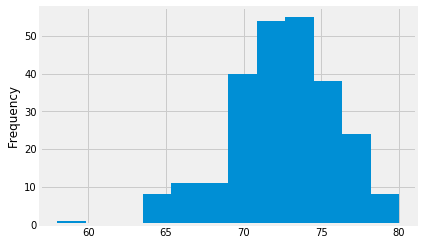

In [31]:

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# temp v freq #################################################################################################

plt.hist(tobsHighCountDFClean.Temp, bins=12)
plt.ylabel("Frequency")
plt.axis(55, 90, 0, 70)
plt.grid(True)
plt.plot()
###################################################### Need to plot histogram
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# temp v freq 

![precipitation](Images/station-histogram.png)

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 68.24137931034483, 74.0)]


In [33]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 68.24137931034483, 74.0)]


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
